In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline

## Data Cleaning

In [3]:
df_rough=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating',
                'Recommended IND','Positive Feedback Count','Division Name',
                'Department Name','Class Name']

In [4]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

## EDA

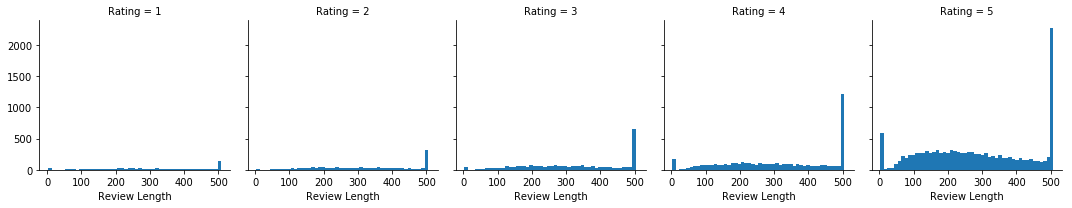

In [8]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

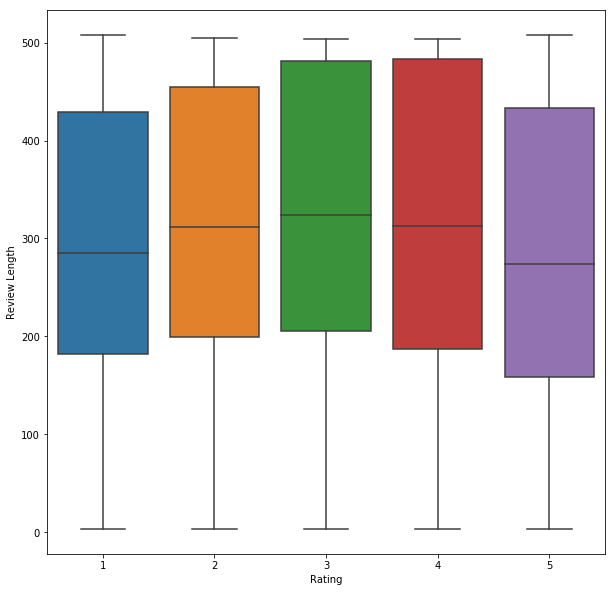

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

In [10]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


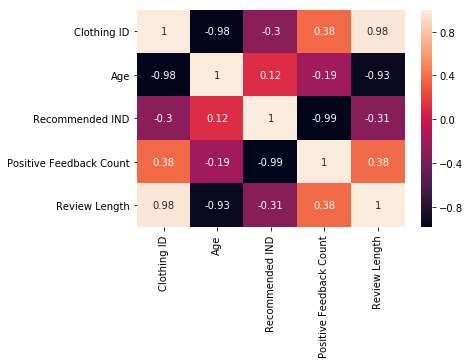

In [11]:
sns.heatmap(data=rating.corr(), annot=True)

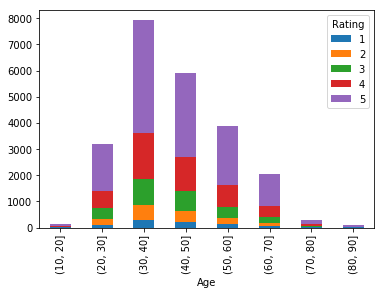

In [12]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

<Figure size 1080x1080 with 0 Axes>

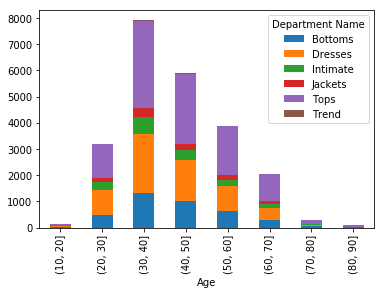

In [13]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

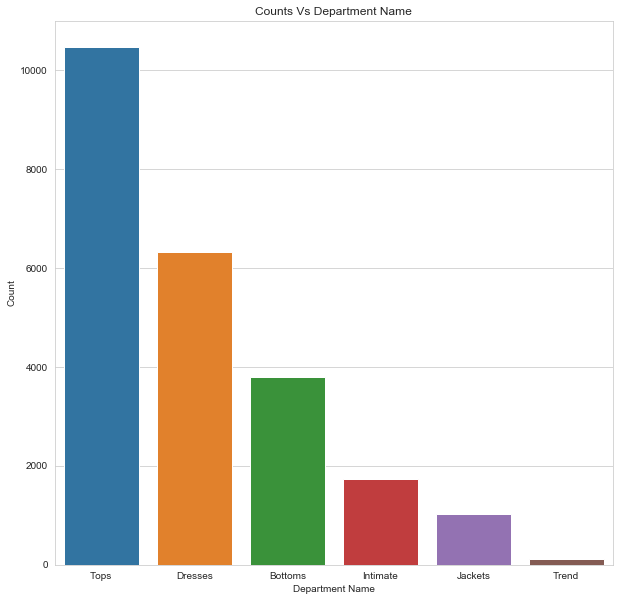

In [16]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")
plt.show()

## NLP

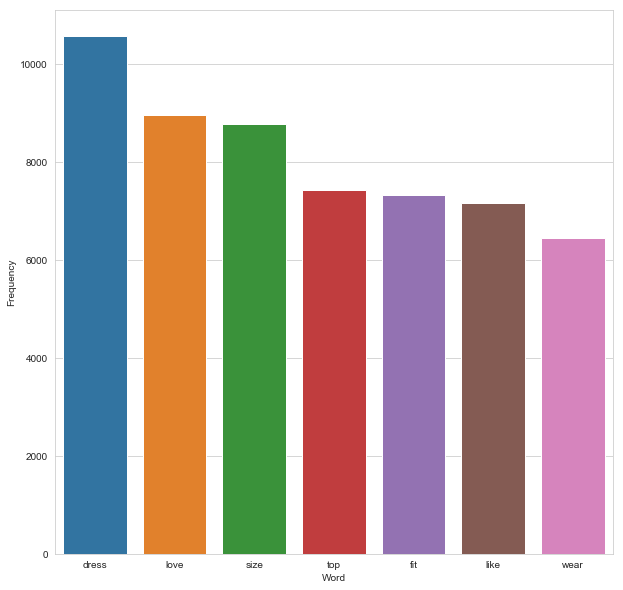

In [22]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

top_N = 100
#convert list of list into text
a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [39]:
from PIL import Image
from os import path
# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open("Shoe.jpg"))

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000, 
                   mask=mask, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

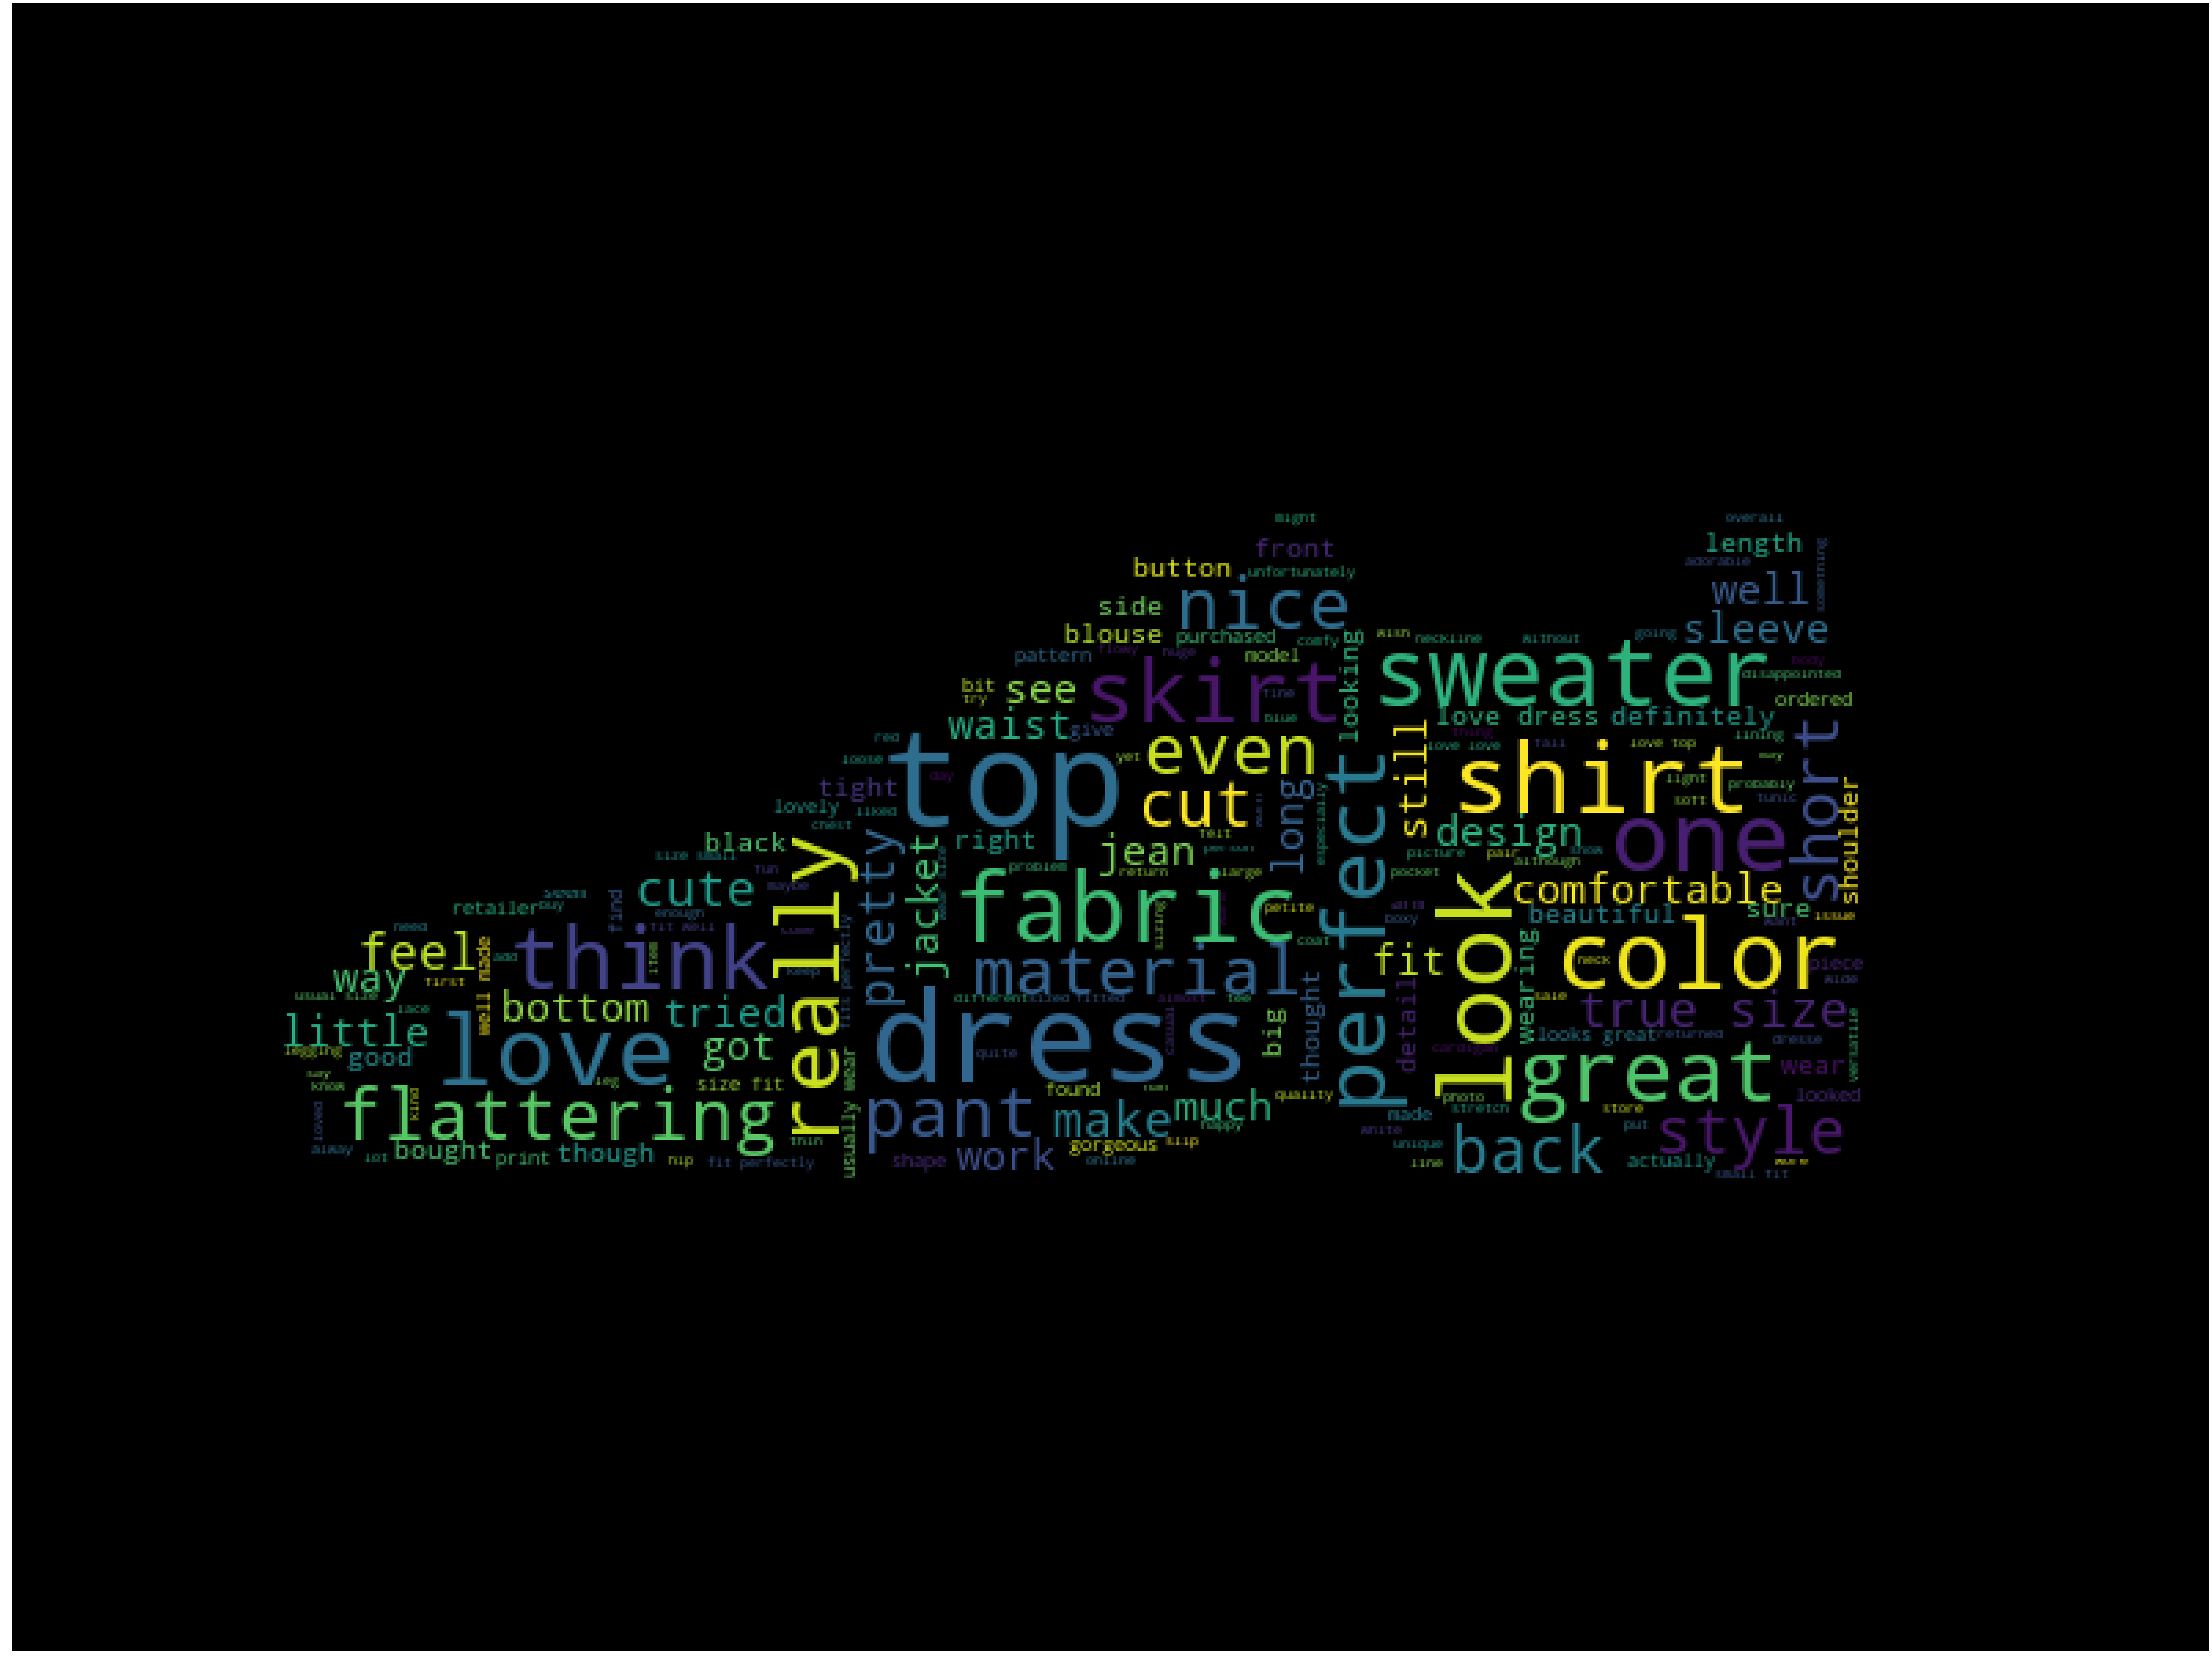

In [40]:
wc(cleaned_data_title,'black', 'Most Used Words',)

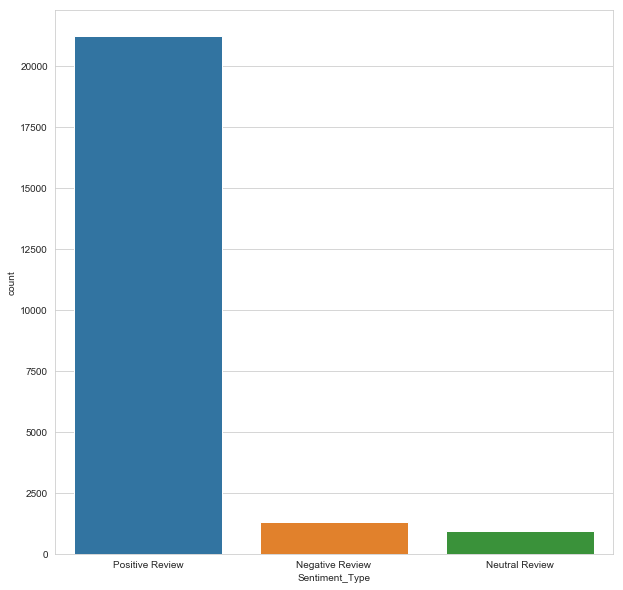

In [42]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity,
                          blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(
        bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [43]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

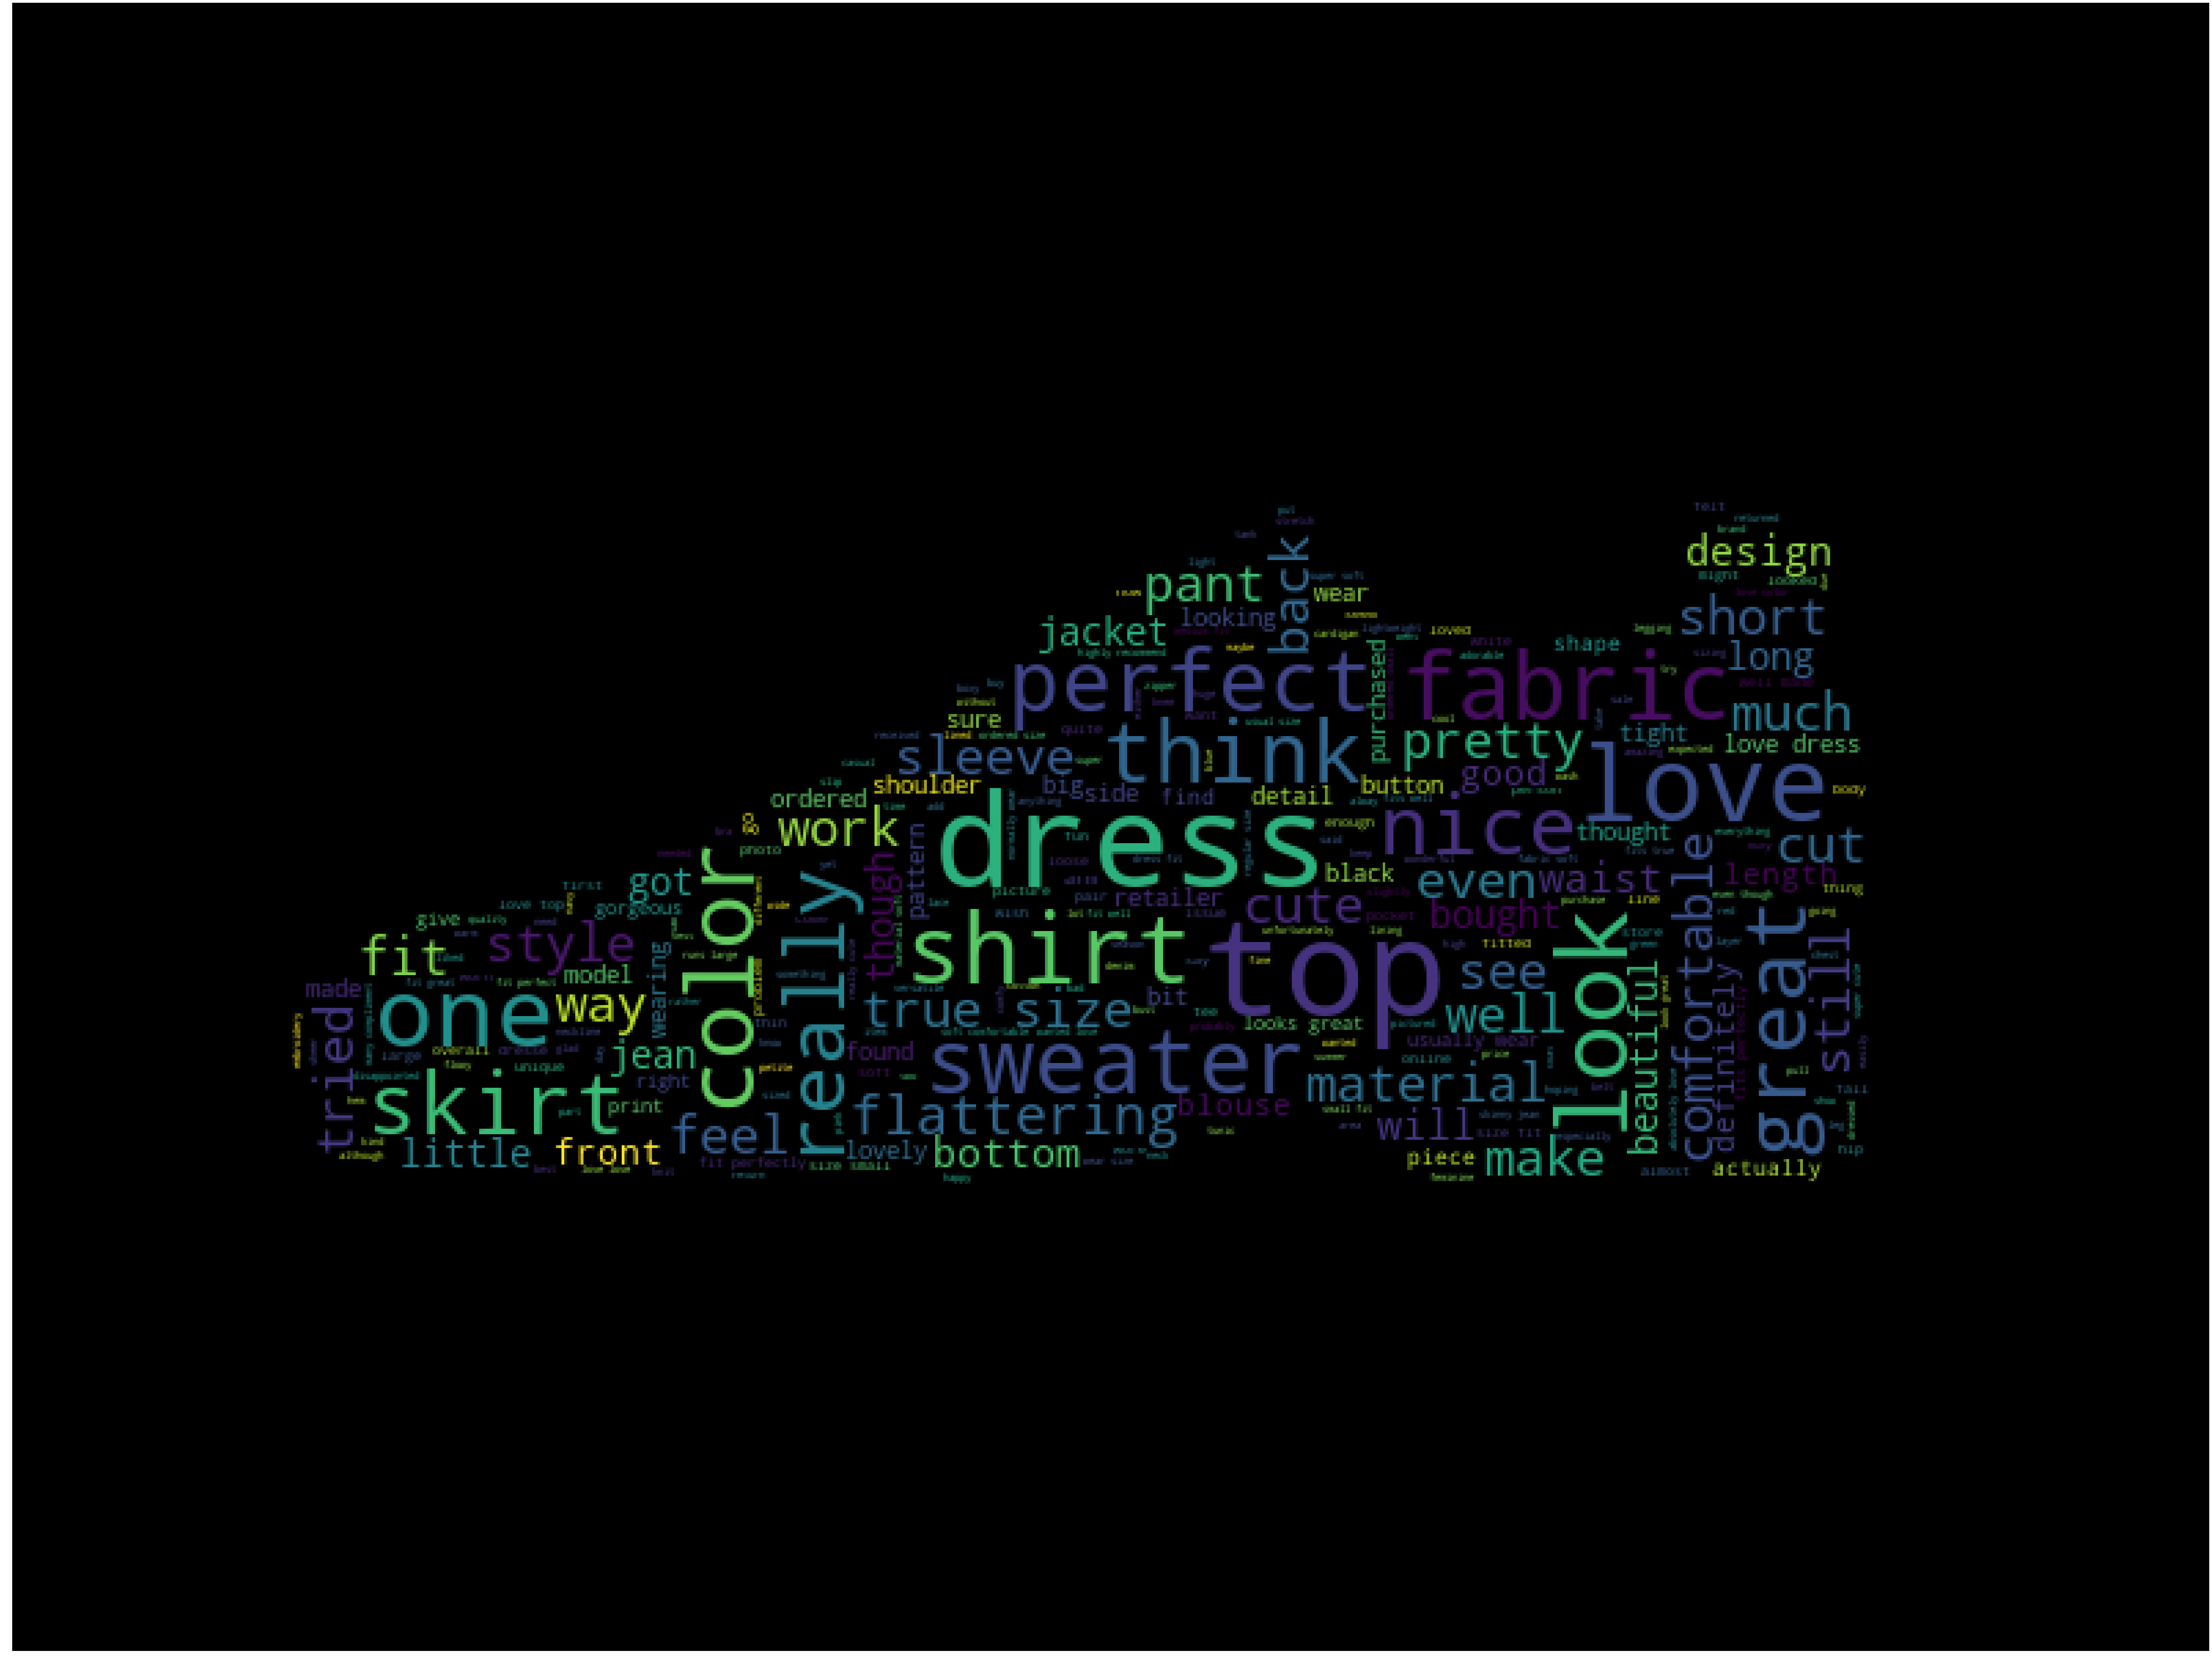

In [44]:
wc(positive_reviews['Review'],'black','Most Used Words')

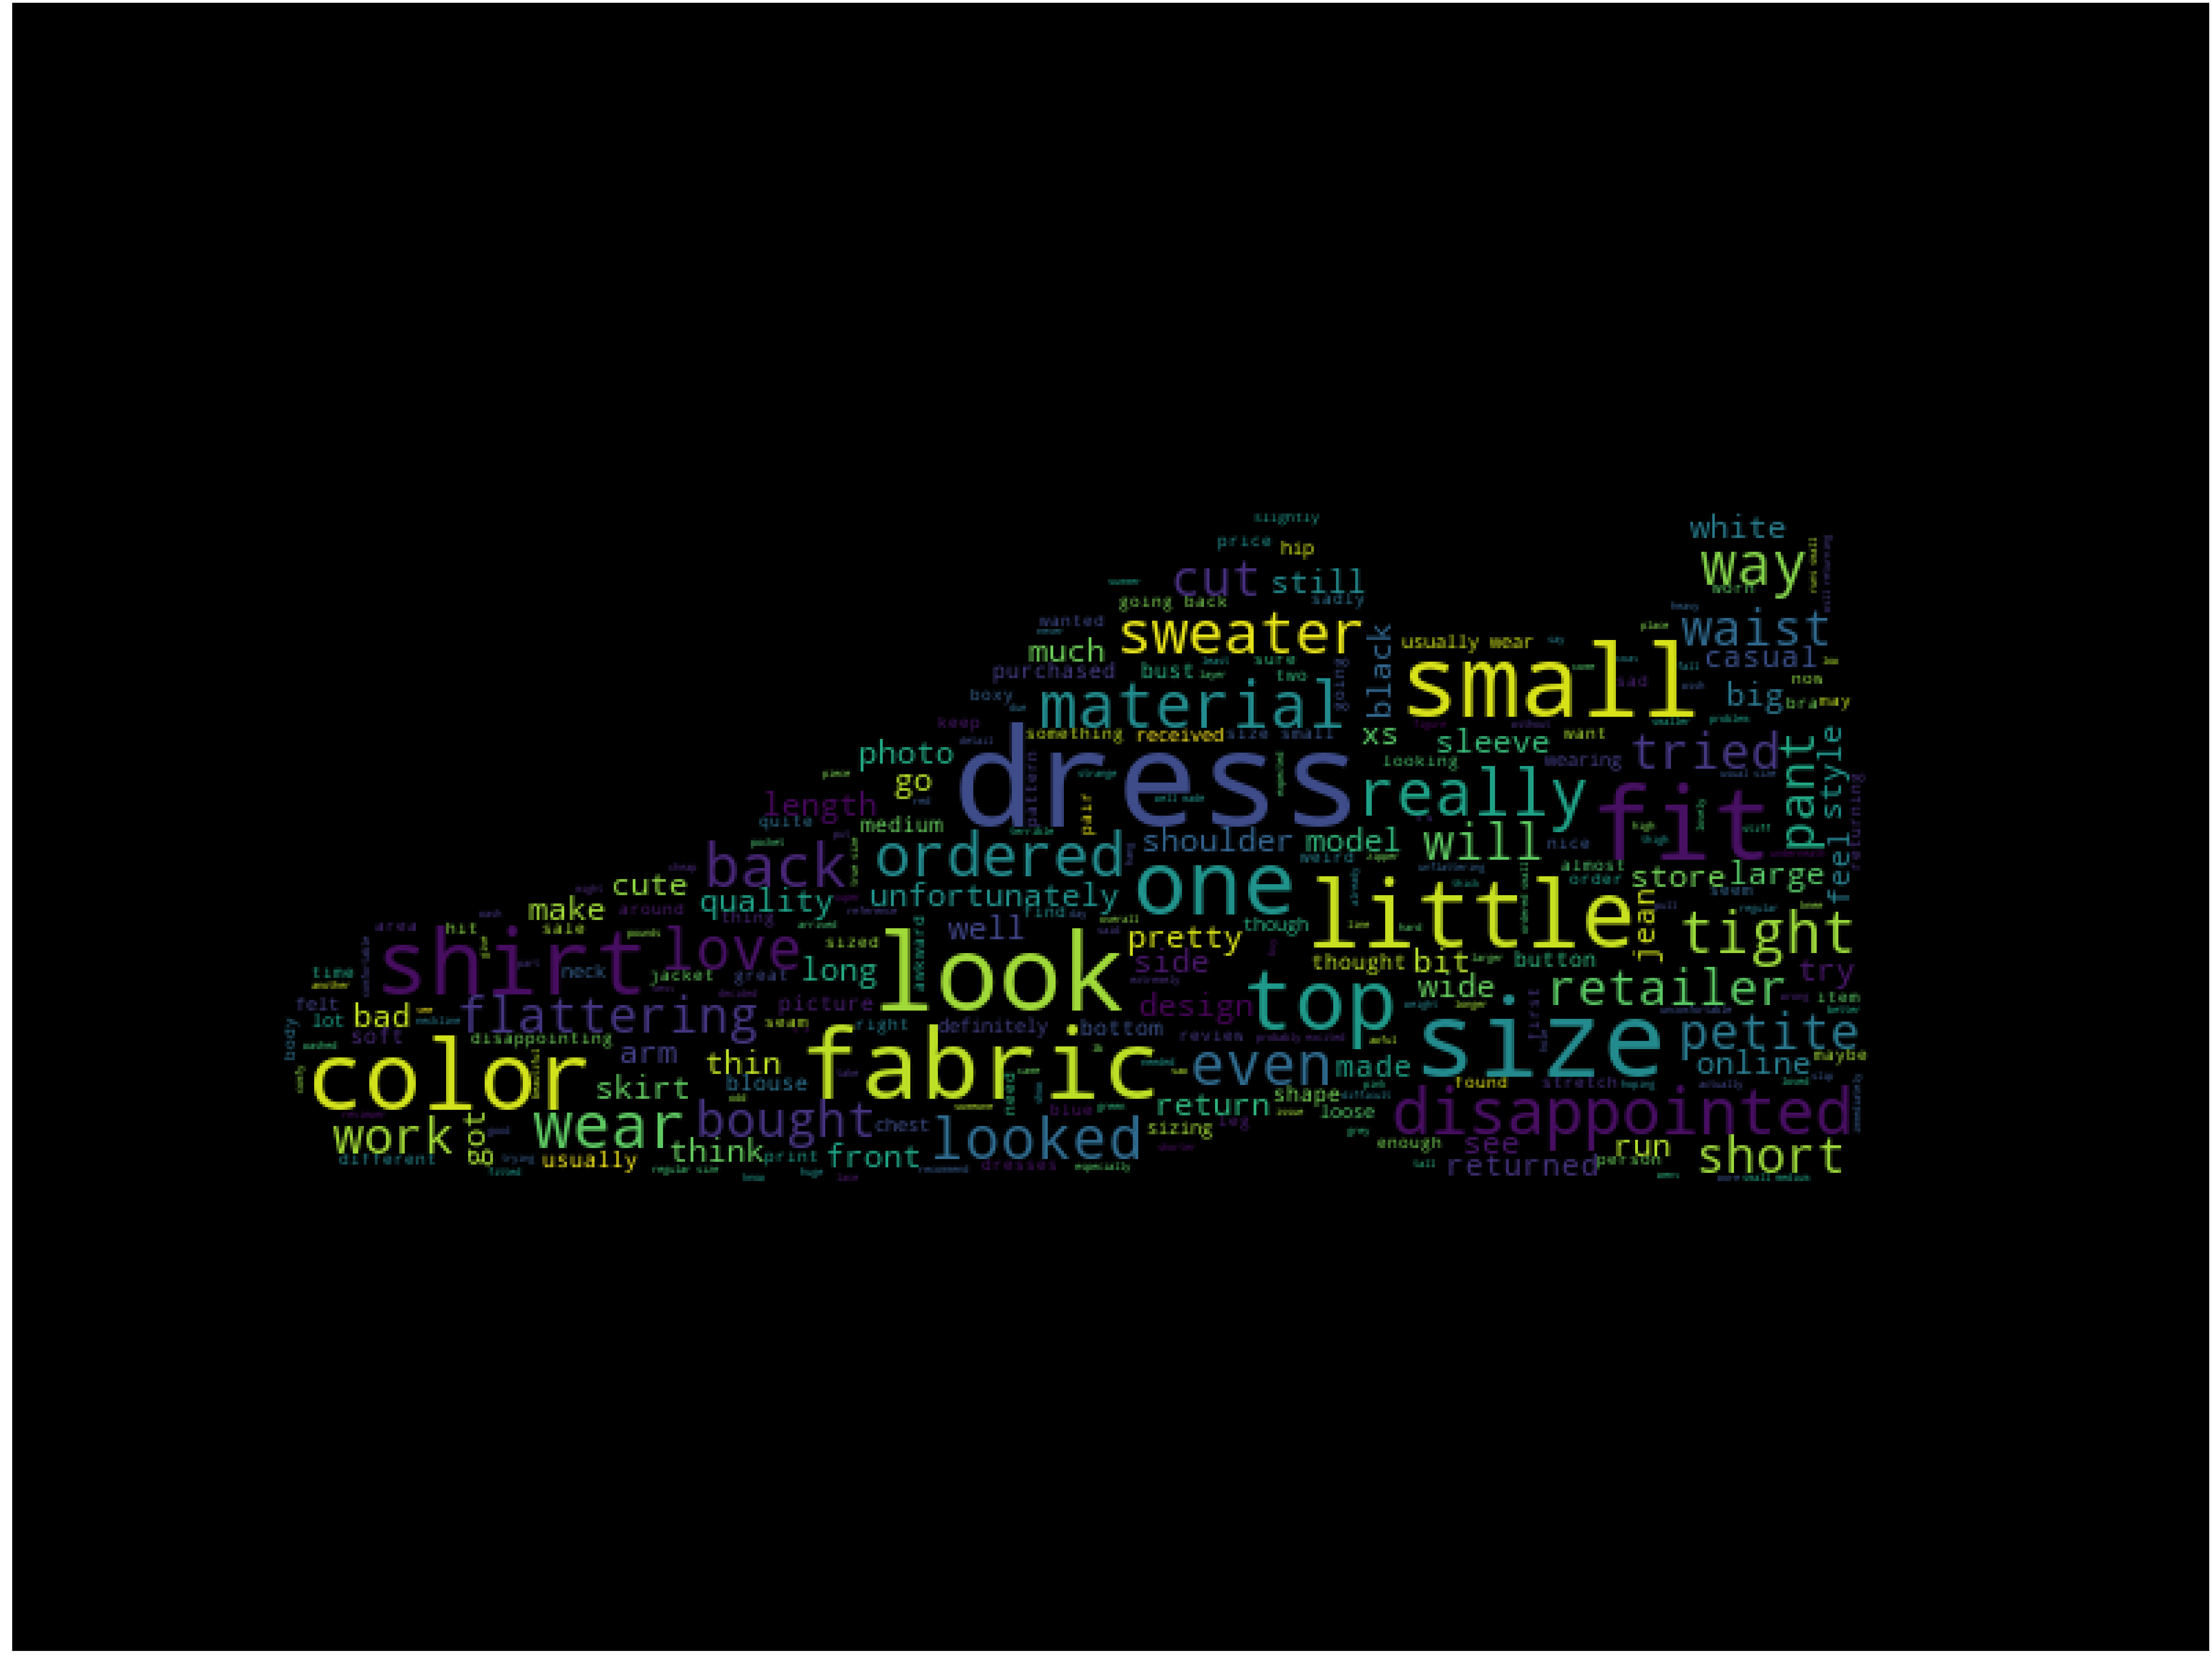

In [45]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [46]:
#  removes the punctuations, converts word into lower case, and removes 
# the stopwords from the sentence.
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
df['Review Text'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

In [48]:
# Convert the review text collection into a matrix of token counts
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [50]:
X_review = bow_transformer.transform(X_review)

## Modeling

In [51]:
# Create Training Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_review, y, test_size=0.3, random_state=101)

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=101)
clffit = clf.fit(X_review, y)

In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clffit,X_review, y, cv=10)
print(score.mean())
print(score.std())

0.9401732261130293
0.00024277754492391912


### Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
predict=nb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))
score_nb = cross_val_score(nb, X_review, y, cv=10)
print(score_nb.mean())
print(score_nb.std())

[[  65  149]
 [  11 3240]]


              precision    recall  f1-score   support

           1       0.86      0.30      0.45       214
           5       0.96      1.00      0.98      3251

   micro avg       0.95      0.95      0.95      3465
   macro avg       0.91      0.65      0.71      3465
weighted avg       0.95      0.95      0.94      3465

0.9588745267613714
0.007225154157112137


Naive Bayes performs better than Random Forest. I'll see if tuning the Random Forest model changes things. 

### Tuning Random Forest

In [71]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [1, 50, 100, 500],
    'min_samples_leaf': [1, 50, 100, 500],
    'min_samples_split': [10, 50, 100, 500],
    'n_estimators': [100, 200, 300, 1000]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clffit, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_review, y)
grid_search.best_params_

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 30.7min finished


{'bootstrap': False,
 'max_depth': 500,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [73]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [False],
    'max_depth': [500, 1000, 1500, 2000 ],
    'min_samples_leaf': [1, 5, 10, 50],
    'min_samples_split': [2, 5, 10, 50],
    'n_estimators': [200, 300, 500]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clffit, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_review, y)
grid_search.best_params_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 29.6min finished


{'bootstrap': False,
 'max_depth': 500,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [81]:
clf = RandomForestClassifier(n_estimators=200, max_depth=500, bootstrap=False,
                             random_state=101, min_samples_leaf=1, 
                             min_samples_split=2)
clffit = clf.fit(X_review, y)

score = cross_val_score(clffit,X_review, y, cv=10)
print(score.mean())
print(score.std())

0.9498698972633475
0.0025275307011481266


## Conclusion: 
Looks like Naive Bayes it is!